# Organizational Oscillation V2

This notebook runs the PySD model. It runs the vensim .mdl model

Last Update: 11/13/2023
Author: @georgia-max


In [1]:
import pysd 
import pandas as pd
import netCDF4
import matplotlib.pyplot as plt

In [7]:
model = pysd.read_vensim("../Vensimmodel/Organizational_oscillation_v2.mdl")
model.doc

,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment
0,"""Change in Non-Safety Focus.""",change_in_nonsafety_focus,None,None,"(nan, nan)",Auxiliary,Normal,None
1,"""Change in Safety Focus.""",change_in_safety_focus_1,None,None,"(nan, nan)",Auxiliary,Normal,None
2,"""NonSafety Focus.""",nonsafety_focus,None,None,"(nan, nan)",Stateful,Integ,None
3,"""Safety Focus.""",safety_focus,None,None,"(nan, nan)",Stateful,Integ,None
4,"""Safety Performance.""",safety_performance,None,None,"(nan, nan)",Auxiliary,Normal,None
5,"""Safety Threshold.""",safety_threshold,None,None,"(nan, nan)",Constant,Normal,None
6,"""Time to Adjust.""",time_to_adjust,None,None,"(nan, nan)",Constant,Normal,None
7,Acceptable Safety performance,acceptable_safety_performance,None,None,"(nan, nan)",Constant,Normal,None
8,Additional Serious Errors,additional_serious_errors,None,None,"(nan, nan)",Auxiliary,Normal,None
9,Change in Non Safety Focus,change_in_non_safety_focus,None,None,"(nan, nan)",Auxiliary,Normal,None


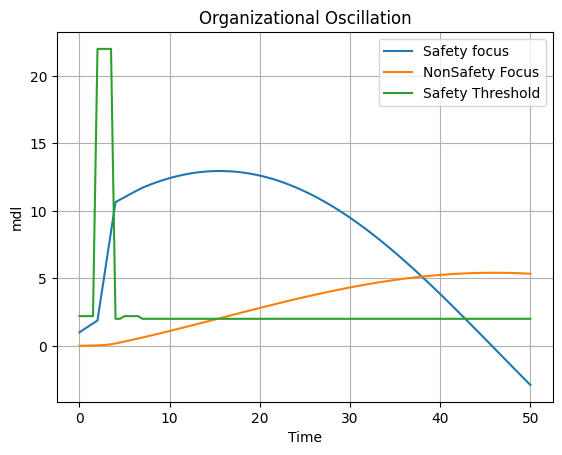

In [19]:
#Base Model 
condition = {'Pulse start time': 0, 'Pulse end time': 10, 'Pulse Quantity 1':10, 'Pulse duration': 2, 'Pulse Time': 2,  'initial Safety Threshold': 0 }

# condition = {'Pulse start time': 0, 'Pulse end time': 10, 'Pulse Quantity 1':10, 'Pulse duration': 2, 'Pulse Time': 2,  'initial Safety Threshold': 0 }

m1 = model.run(params= condition)

m1['Safety focus'].plot()
m1['NonSafety Focus'].plot()
m1['Safety Threshold'].plot()

plt.title("Organizational Oscillation") 
# plt.ylim(-1000, 1000)

plt.ylabel("mdl")
plt.xlabel("Time")
plt.legend()
plt.grid()


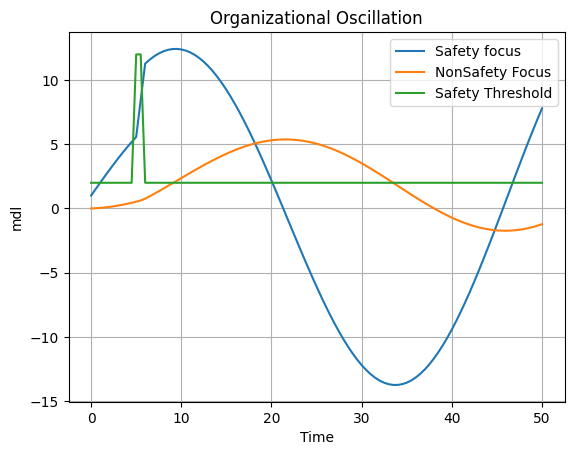

In [9]:
# model.doc
condition = {'Pulse start time': 0, 'Pulse end time': 30, 'Pulse Quantity 1': 5, 'Pulse duration': 1, 'Pulse Time': 5}

m2 = model.run(params = condition)

m2['Safety focus'].plot()
m2['NonSafety Focus'].plot()
m2['Safety Threshold'].plot()

plt.title("Organizational Oscillation") 
# plt.ylim(-1000, 1000)
plt.ylabel("mdl")
plt.xlabel("Time")
plt.legend()
plt.grid()

# plt.title("Safety focus")
# plt.ylabel("mdl")
# plt.xlabel("Time")
# plt.grid()

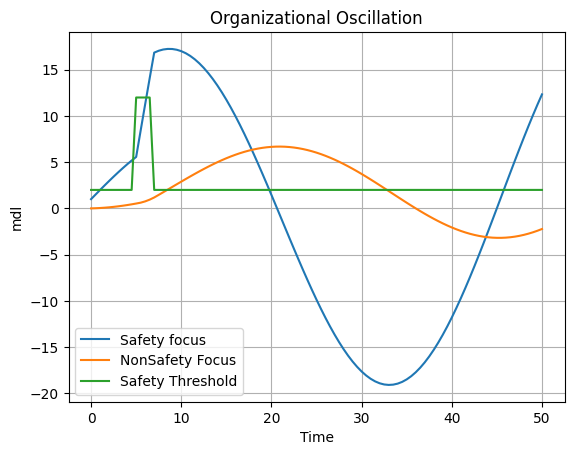

In [10]:
condition = {'Pulse start time': 1, 'Pulse end time': 0, 'Pulse Quantity 1': 5, 'Pulse duration': 2, 'Pulse repeat time': 5, 'Pulse Time':  5}

m3 = model.run(params= condition)

m3['Safety focus'].plot()
m3['NonSafety Focus'].plot()
m3['Safety Threshold'].plot()

plt.title("Organizational Oscillation") 
plt.ylabel("mdl")
plt.xlabel("Time")
# plt.ylim(-1500, 1500)

plt.legend()
plt.grid()

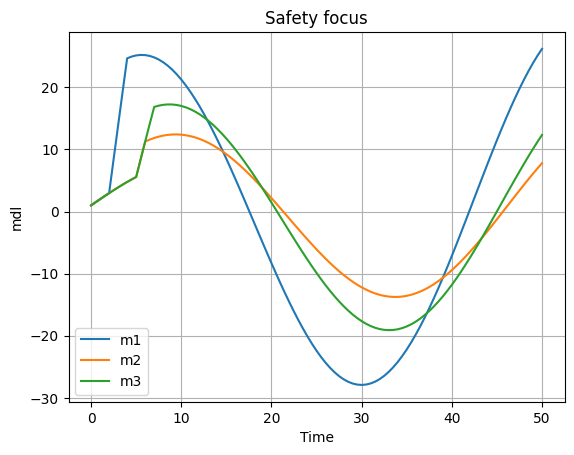

In [11]:
m1['Safety focus'].plot(label = 'm1')
m2['Safety focus'].plot(label = 'm2')
m3['Safety focus'].plot(label = 'm3')

plt.title("Safety focus")
plt.ylabel("mdl")
plt.xlabel("Time")
plt.grid()
plt.legend()
plt.show()

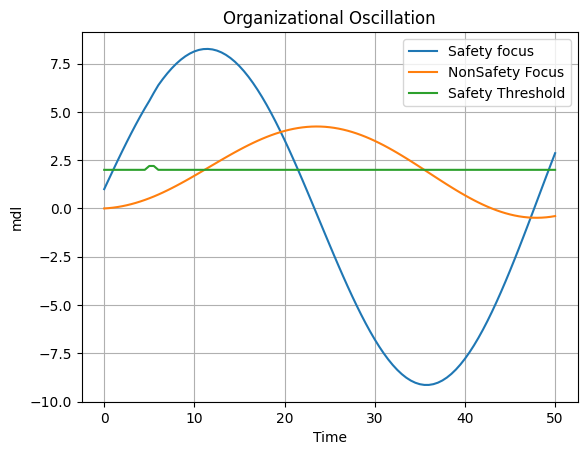

In [12]:
condition = {'Pulse start time': 0, 'Pulse end time': 10, 'Pulse Quantity 1': 0.1, 'Pulse duration': 1, 'Pulse Time': 5}

m1 = model.run(params= condition)

m1['Safety focus'].plot()
m1['NonSafety Focus'].plot()
m1['Safety Threshold'].plot()

plt.title("Organizational Oscillation") 
plt.ylabel("mdl")
plt.xlabel("Time")
plt.legend()
plt.grid()

# Test 1. Time to adjust focus 

Testing different time to adjust focus. According to XX, management style effects the timing the organization deals with adjusting to safety focus. The shorter the time to adjust focus, the faster the organization adapts. 

- Hypothesis: the longer it took to adjust focus, the longer the cycle runs.
- Condition: There is a pulse at time 5, with a duration of 1.
- Parameter: Time to adjust focus = [5, 10, 15]
- Result:  




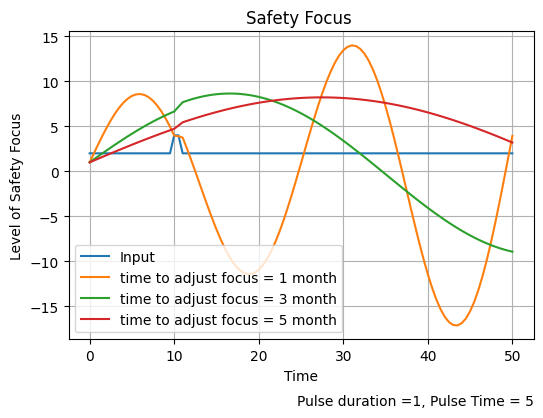

In [18]:

fig, ax = plt.subplots(figsize=(6,4))


# condition = {'Pulse start time': 0, 'Pulse end time': 10, 'Pulse Quantity': 0.1, 'Pulse duration': 0, 'Time to adjust focus': 5}
condition = {'Pulse start time': 1, 'Pulse end time': 0, 'Pulse Quantity 1': 1, 'Pulse duration': 1, 'Pulse repeat time': 5, 'Pulse Time':  10, 'Time to adjust focus': 1}

m1 = model.run(params= condition)
m1['Safety Threshold'].plot(label = 'Input')

m1['Safety focus'].plot(label = 'time to adjust focus = 1 month')

condition = {'Pulse start time': 1, 'Pulse end time': 0, 'Pulse Quantity 1': 1, 'Pulse duration': 1, 'Pulse repeat time': 5, 'Pulse Time':  10, 'Time to adjust focus': 3}

# condition = {'Pulse start time': 0, 'Pulse end time': 10, 'Pulse Quantity': 0.1, 'Pulse duration': 0, 'Time to adjust focus': 10}
m2 = model.run(params= condition)
m2['Safety focus'].plot(label = 'time to adjust focus = 3 month')
# m2['Safety Threshold'].plot()

condition = {'Pulse start time': 1, 'Pulse end time': 0, 'Pulse Quantity 1': 1, 'Pulse duration': 1, 'Pulse repeat time': 5, 'Pulse Time':  10, 'Time to adjust focus': 5}
m3 = model.run(params= condition)
m3['Safety focus'].plot(label = 'time to adjust focus = 5 month')
# m3['Safety Threshold'].plot()


# condition = {'Pulse start time': 0, 'Pulse end time': 10, 'Pulse Quantity': 0.1, 'Pulse duration': 0, 'Time to adjust focus': 20}
# m4 = model.run(params= condition)
# m4['Safety focus'].plot(label = 'time to adjust focus = 20')
# # m4['Safety Threshold'].plot()

plt.title("Safety Focus ") 
plt.ylabel("Level of Safety Focus")
plt.xlabel("Time")
# plt.ylim(-1000, 1000)

plt.legend()
plt.grid()

# Add a footnote below and to the right side of the chart
ax.annotate('Pulse duration =1, Pulse Time = 5',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)



plt.show()

# Test 2. magnitude of the error incident. 

Testing different magnitude of the incident. According to XX, the larger the safety incident (Pulse Quantity), the longer the cycle. 

- Hypothesis: the larger the safety incident (Pulse Quantity), the larger the cycle time
- Condition: There is a pulse at time 5, with a duration of 1. 
- Result: Confirm 

#TODO find reference literature on the magnitude of the error incident. 


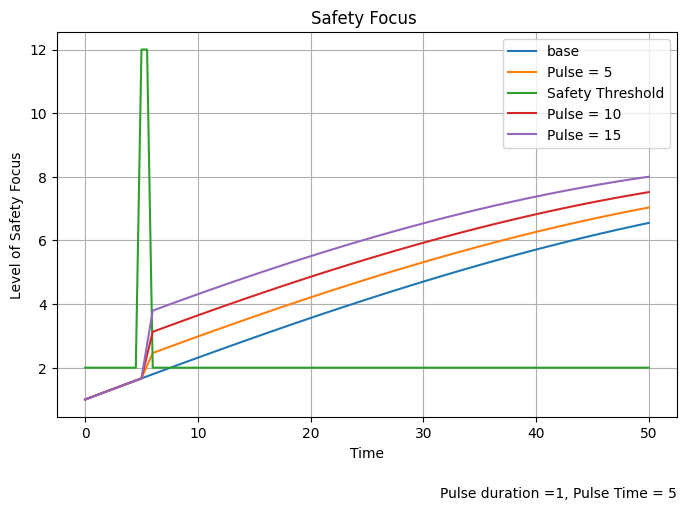

In [16]:

fig, ax = plt.subplots(figsize=(8,5))


condition = {'Pulse start time': 0, 'Pulse end time': 10, 'Pulse Quantity': 0.1, 'Pulse duration': 0}

m1 = model.run(params= condition)

m1['Safety focus'].plot(label = 'base')
# m1['Safety Threshold'].plot()


condition = {'Pulse start time': 1, 'Pulse end time': 0, 'Pulse Quantity 1': 5, 'Pulse duration': 1, 'Pulse repeat time': 5, 'Pulse Time':  5}
m2 = model.run(params= condition)
m2['Safety focus'].plot(label = 'Pulse = 5')
m2['Safety Threshold'].plot()

condition = {'Pulse start time': 1, 'Pulse end time': 0, 'Pulse Quantity 1': 10, 'Pulse duration': 1, 'Pulse repeat time': 5, 'Pulse Time':  5}
m3 = model.run(params= condition)
m3['Safety focus'].plot(label = 'Pulse = 10')
# m3['Safety Threshold'].plot()


condition = {'Pulse start time': 1, 'Pulse end time': 0, 'Pulse Quantity 1': 15, 'Pulse duration': 1, 'Pulse repeat time': 5, 'Pulse Time':  5}
m4 = model.run(params= condition)
m4['Safety focus'].plot(label = 'Pulse = 15')
# m4['Safety Threshold'].plot()

plt.title("Safety Focus ") 
plt.ylabel("Level of Safety Focus")
plt.xlabel("Time")
# plt.ylim(-1000, 1000)

plt.legend()
plt.grid()

# Add a footnote below and to the right side of the chart
ax.annotate('Pulse duration =1, Pulse Time = 5',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)



plt.show()